# Tugas Data MBA
# Klasifikasi Titanic
# Bey

In [65]:
# import pandas as pd
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dtime
## algorithm for classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import style

In [67]:
from sklearn.linear_model import SGDClassifier

In [7]:
train_df = pd.read_csv('D:\Absolut Data Indonesia\Training\IYKRA_DATA_MBA_2020\Titanic.csv',index_col=0)

In [8]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
#Mencari Data yang Hilang

total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


In [10]:
#Hasilnya :
#Cabin mempunyai data yang hilang hingga 77.1%
#Age mempunyai data yg hilang sebesar 19.9%
#Embarked mempunyai data yang hilang 0.2%

In [11]:
train_df.columns.values

array(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

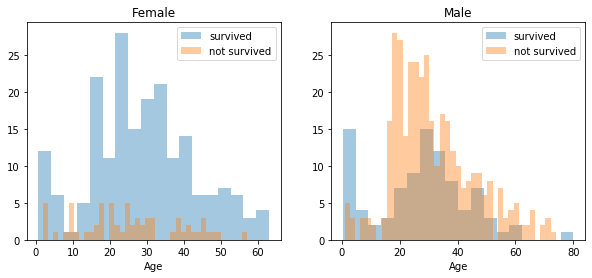

In [12]:
#Pengecekan Age dan Sex
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

C:\Users\Absolut Data\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


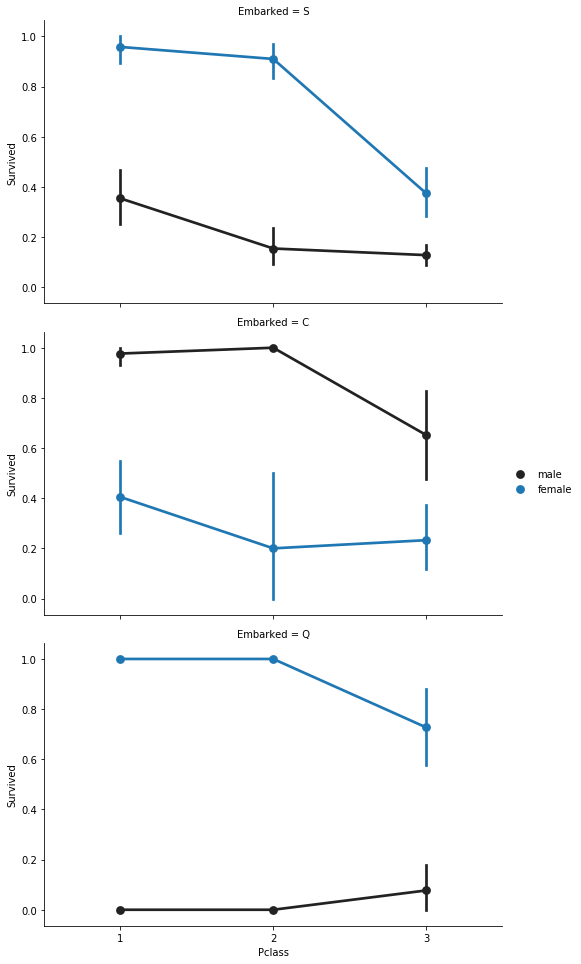

In [13]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

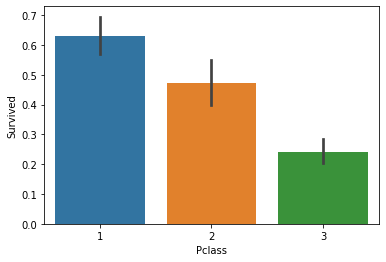

In [14]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

C:\Users\Absolut Data\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


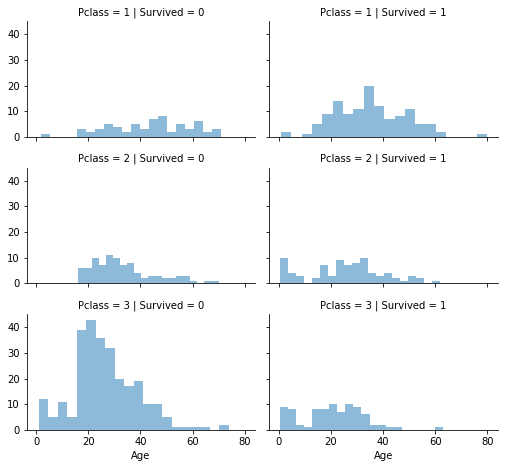

In [15]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [16]:
#Membuat Fitur Baru

In [17]:
data = [train_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

C:\Users\Absolut Data\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


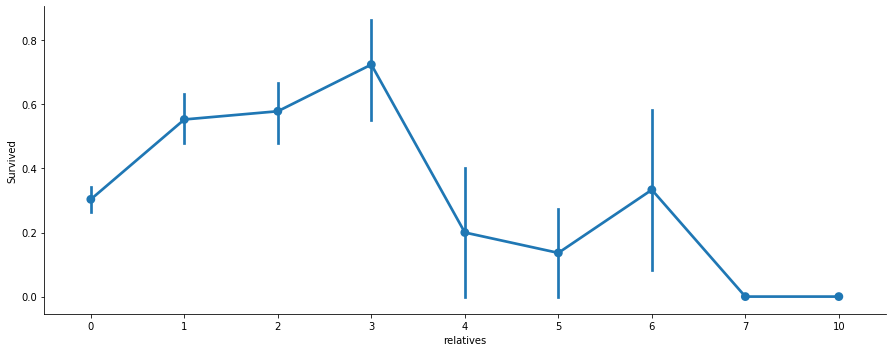

In [18]:
axes = sns.factorplot('relatives','Survived', 
                      data=train_df, aspect = 2.5, )

In [19]:
#Penumpang selamat akan meningkat saat Relatives di 0-3 dan menurun saat relatives lebih dari 4

In [20]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [21]:
#Deck from Cabin

In [22]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df]

In [23]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [24]:
for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

In [25]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone,Deck
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S,1,0,8
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,3
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S,0,1,8
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,3
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S,0,1,8


In [26]:
train_df = train_df.drop(['Cabin'], axis=1)

In [27]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,8
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,3
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,8
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,3
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,8


In [28]:
train_df["Age"].isnull().sum()

177

In [29]:
data = [train_df]

In [30]:
for dataset in data:
    mean = train_df["Age"].mean()
    std = train_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
train_df["Age"].isnull().sum()

0

In [31]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [32]:
common_value = 'S'
data = [train_df]

In [33]:
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int32  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int32  
 12  Deck       891 non-null    int32  
dtypes: float64(1), int32(3), int64(5), object(4)
memory usage: 127.0+ KB


In [35]:
data = [train_df]

In [36]:
for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [37]:
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
data = [train_df]

In [38]:
for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_df = train_df.drop(['Name'], axis=1)

In [39]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck,Title
PassengerId,,,,,,,,,,,,,
1,0,3,male,22,1,0,A/5 21171,7,S,1,0,8,1
2,1,1,female,38,1,0,PC 17599,71,C,1,0,3,3
3,1,3,female,26,0,0,STON/O2. 3101282,7,S,0,1,8,2
4,1,1,female,35,1,0,113803,53,S,1,0,3,3
5,0,3,male,35,0,0,373450,8,S,0,1,8,1


In [40]:
genders = {"male": 0, "female": 1}
data = [train_df]

In [41]:
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [42]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck,Title
PassengerId,,,,,,,,,,,,,
1,0,3,0,22,1,0,A/5 21171,7,S,1,0,8,1
2,1,1,1,38,1,0,PC 17599,71,C,1,0,3,3
3,1,3,1,26,0,0,STON/O2. 3101282,7,S,0,1,8,2
4,1,1,1,35,1,0,113803,53,S,1,0,3,3
5,0,3,0,35,0,0,373450,8,S,0,1,8,1


In [43]:
train_df['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

In [44]:
train_df = train_df.drop(['Ticket'], axis=1)

In [45]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
PassengerId,,,,,,,,,,,,
1,0,3,0,22,1,0,7,S,1,0,8,1
2,1,1,1,38,1,0,71,C,1,0,3,3
3,1,3,1,26,0,0,7,S,0,1,8,2
4,1,1,1,35,1,0,53,S,1,0,3,3
5,0,3,0,35,0,0,8,S,0,1,8,1


In [46]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df]

In [47]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
PassengerId,,,,,,,,,,,,
1,0,3,0,22,1,0,7,S,1,0,8,1
2,1,1,1,38,1,0,71,C,1,0,3,3
3,1,3,1,26,0,0,7,S,0,1,8,2
4,1,1,1,35,1,0,53,S,1,0,3,3
5,0,3,0,35,0,0,8,S,0,1,8,1


In [48]:
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [49]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
PassengerId,,,,,,,,,,,,
1,0,3,0,22,1,0,7,0,1,0,8,1
2,1,1,1,38,1,0,71,1,1,0,3,3
3,1,3,1,26,0,0,7,0,0,1,8,2
4,1,1,1,35,1,0,53,0,1,0,3,3
5,0,3,0,35,0,0,8,0,0,1,8,1


In [50]:
data[0].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
PassengerId,,,,,,,,,,,,
1,0,3,0,22,1,0,7,0,1,0,8,1
2,1,1,1,38,1,0,71,1,1,0,3,3
3,1,3,1,26,0,0,7,0,0,1,8,2
4,1,1,1,35,1,0,53,0,1,0,3,3
5,0,3,0,35,0,0,8,0,0,1,8,1


In [51]:
data[0].Age.unique()

array([22, 38, 26, 35, 24, 54,  2, 27, 14,  4, 58, 20, 39, 55, 23, 31, 42,
       34, 15, 28,  8, 18, 19, 40, 32, 66, 21, 33,  3, 43,  7, 49, 29, 65,
        5, 11, 45, 17, 16, 25, 37,  0, 30, 46, 59, 71, 36, 47, 70, 41, 12,
        9, 51, 44,  1, 61, 56, 50, 62, 52, 63, 60, 10, 64, 13, 48, 53, 57,
       80,  6, 74])

In [52]:
data = [train_df]

In [53]:
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [54]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
PassengerId,,,,,,,,,,,,
1,0,3,0,2,1,0,7,0,1,0,8,1
2,1,1,1,5,1,0,71,1,1,0,3,3
3,1,3,1,3,0,0,7,0,0,1,8,2
4,1,1,1,5,1,0,53,0,1,0,3,3
5,0,3,0,5,0,0,8,0,0,1,8,1


In [55]:
train_df['Age'].value_counts()

6    170
5    158
4    152
3    130
2    110
1    103
0     68
Name: Age, dtype: int64

In [56]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
PassengerId,,,,,,,,,,,,
1,0,3,0,2,1,0,7,0,1,0,8,1
2,1,1,1,5,1,0,71,1,1,0,3,3
3,1,3,1,3,0,0,7,0,0,1,8,2
4,1,1,1,5,1,0,53,0,1,0,3,3
5,0,3,0,5,0,0,8,0,0,1,8,1
6,0,3,0,3,0,0,8,2,0,1,8,1
7,0,1,0,6,0,0,51,0,0,1,5,1
8,0,3,0,0,3,1,21,0,4,0,8,4
9,1,3,1,3,0,2,11,0,2,0,8,3


In [57]:
data = [train_df]

In [58]:
for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [59]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
PassengerId,,,,,,,,,,,,
1,0,3,0,2,1,0,0,0,1,0,8,1
2,1,1,1,5,1,0,3,1,1,0,3,3
3,1,3,1,3,0,0,0,0,0,1,8,2
4,1,1,1,5,1,0,3,0,1,0,3,3
5,0,3,0,5,0,0,1,0,0,1,8,1
6,0,3,0,3,0,0,1,2,0,1,8,1
7,0,1,0,6,0,0,3,0,0,1,5,1
8,0,3,0,0,3,1,2,0,4,0,8,4
9,1,3,1,3,0,2,1,0,2,0,8,3


In [60]:
data = [train_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [61]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)
# Let's take a last look at the training set, before we start training the models.
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
PassengerId,,,,,,,,,,,,,,
1,0,3,0,2,1,0,0,0,1,0,8,1,6,0
2,1,1,1,5,1,0,3,1,1,0,3,3,5,1
3,1,3,1,3,0,0,0,0,0,1,8,2,9,0
4,1,1,1,5,1,0,3,0,1,0,3,3,5,1
5,0,3,0,5,0,0,1,0,0,1,8,1,15,1
6,0,3,0,3,0,0,1,2,0,1,8,1,9,1
7,0,1,0,6,0,0,3,0,0,1,5,1,6,3
8,0,3,0,0,3,1,2,0,4,0,8,4,0,0
9,1,3,1,3,0,2,1,0,2,0,8,3,9,0


In [62]:
#Training Several Machine Learning

In [63]:
from sklearn.model_selection import train_test_split
#split train dataset to 80% for training and 20% for testing
train, test = train_test_split(train_df, test_size=0.2, random_state=42, shuffle=True)

X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("Survived", axis=1).copy()


In [68]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
#Stochastic Gradient Descent (SGD)

NameError: name 'linear_model' is not defined

In [70]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
#Random Forest

In [71]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
#Logistic Regression

In [72]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
#K Nearest Neighbor

In [73]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
#Gaussian Naive Bayes

In [74]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
#Perceptron

C:\Users\Absolut Data\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [75]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
#Linear Support Vector Machine

C:\Users\Absolut Data\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [76]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
#Decision Tree

In [77]:
#Mencari Model yang terbaik

In [78]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

NameError: name 'acc_sgd' is not defined

In [79]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.84722222 0.81944444 0.76056338 0.85915493 0.77464789 0.77464789
 0.8028169  0.8028169  0.76056338 0.90140845]
Mean: 0.8103286384976526
Standard Deviation: 0.04442524009809535


In [80]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Title,0.206
Sex,0.162
Age_Class,0.091
Deck,0.089
Pclass,0.076
Age,0.074
Fare,0.071
Embarked,0.057
relatives,0.056


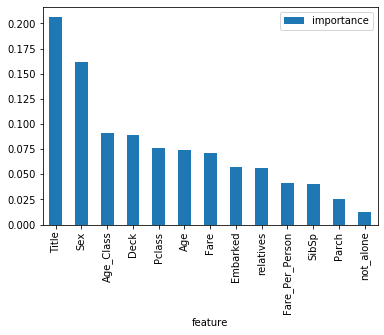

In [81]:
importances.plot.bar()

In [82]:
train  = train.drop("not_alone", axis=1)
test  = test.drop("not_alone", axis=1)

X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("Survived", axis=1).copy()

In [83]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

92.84 %


In [84]:
train  = train.drop("Parch", axis=1)
test  = test.drop("Parch", axis=1)

X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("Survived", axis=1).copy()

In [85]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

92.84 %


In [86]:
train  = train.drop("Fare_Per_Person", axis=1)
test  = test.drop("Fare_Per_Person", axis=1)

X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("Survived", axis=1).copy()

In [87]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

92.84 %


In [88]:
train  = train.drop("Embarked", axis=1)
test  = test.drop("Embarked", axis=1)

X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("Survived", axis=1).copy()

In [89]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

91.29 %


In [90]:
train  = train.drop("SibSp", axis=1)
test  = test.drop("SibSp", axis=1)

X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("Survived", axis=1).copy()

In [91]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

90.87 %


In [92]:
train  = train.drop("Age_Class", axis=1)
test  = test.drop("Age_Class", axis=1)

X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("Survived", axis=1).copy()

In [93]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

90.87 %


In [94]:
train  = train.drop("Fare", axis=1)
test  = test.drop("Fare", axis=1)

X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("Survived", axis=1).copy()

In [95]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

88.62 %


In [96]:
train  = train.drop("relatives", axis=1)
test  = test.drop("relatives", axis=1)

X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("Survived", axis=1).copy()

In [97]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

84.13 %
